In [22]:
import numpy as np
import pandas as pd
import math
import lasio
import matplotlib.pyplot as plt  # GRAPHS
import glob
%matplotlib inline

In [2]:
#las = lasio.read(r"C:\Users\Angelica\Desktop\Tinmiaq_2\registros_T2.las")
#las_DM =lasio.read (r"C:\Users\Angelica\Desktop\Tinmiaq_2\DM-2077-4158ft.las")

las = lasio.read('./LAS/T2/T2_Logs.las')
las_DM = lasio.read('./LAS/T2/T2_DM-2077-4158ft.las')


In [3]:
df_1 = las.df()
df_2 = las_DM.df()
df_2 = df_2[["GR_EDTC",'DTCO']]
Depth= las_DM.index
df_1 = df_1[["GR_EDTC", "RHOZ", "DEPTH","AT90","NPHI"]]
df_1['Vsh'] = (df_1.GR_EDTC - 40) / (150 - 40)
df_1['Vclay']=((0.7)*df_1.Vsh) 

mud_density=1.13835   #en g/cc
sand_density=2.65  # g/cc
assumed_density_Vsh=2.75
df_1['grain_density']=((df_1.Vsh*assumed_density_Vsh)+(1-df_1.Vsh)*sand_density)
df_1['porosity']=(df_1.grain_density-df_1.RHOZ)/(df_1.grain_density-mud_density)

In [4]:
top=3660
bottom=3895
dt = 2800
bt=3800
temp=((0.0198*df_1.DEPTH)+ 26.921) 
v= 400000
b=0.88
tsup= 25 #F
WS=18000
RWs= (v/tsup/WS)**b
tf=temp
Kt1=6.77
df_1['RW2']=(RWs*(tsup+Kt1))/(temp+Kt1)
print(RWs)

0.9015416186731294


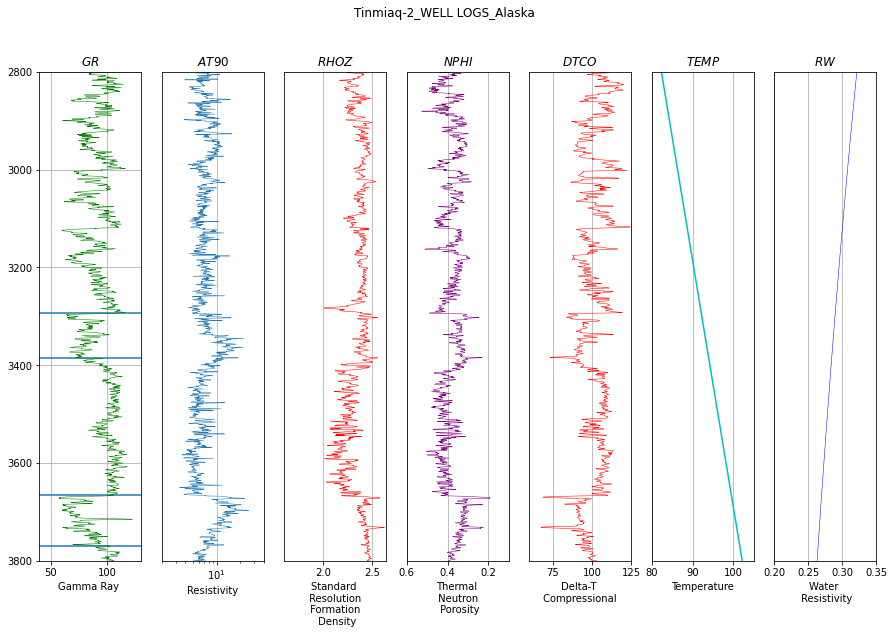

In [5]:
plt.figure(figsize=(15,9))
plt.subplot(171)
plt.plot(df_1.GR_EDTC,df_1.DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130, dt,bt])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3769.49, xmin=0, xmax=130)

plt.hlines(y=3292.25, xmin=0, xmax=130)
plt.hlines(y=3384.75, xmin=0, xmax=130)

plt.hlines(y=2346.92, xmin=0, xmax=130)
plt.hlines(y=2500.65, xmin=0, xmax=130)


plt.subplot(172)
plt.plot(df_1.AT90,df_1.DEPTH,lw=0.5)
plt.axis([2, 40, dt,bt])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(173)
plt.plot(df_1.RHOZ,df_1.DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65, dt,bt])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(174)
plt.plot(df_1.NPHI,df_1.DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1, dt,bt])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(175)
plt.plot(df_2.DTCO,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125, dt,bt])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(176)
plt.plot(temp,df_1.DEPTH,'c')
plt.axis([80, 105, dt,bt])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)

plt.subplot(177)
plt.plot(df_1.RW2,df_1.DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.2, 0.35, dt,bt])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)



plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

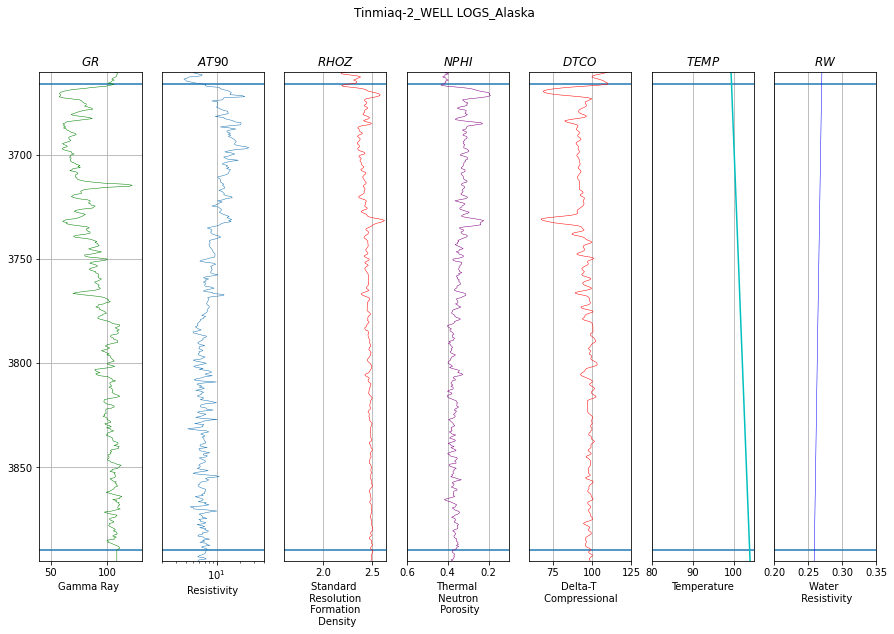

In [6]:
plt.figure(figsize=(15,9))
plt.subplot(171)
plt.plot(df_1.GR_EDTC,df_1.DEPTH,'g',lw=0.5)
plt.title('$GR$')
plt.axis([40, 130, top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(172)
plt.plot(df_1.AT90,df_1.DEPTH,lw=0.5)
plt.axis([2, 40, top,bottom])
plt.title('$AT90$')
plt.xlabel('Resistivity')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(173)
plt.plot(df_1.RHOZ,df_1.DEPTH,'red',lw=0.5)
plt.axis([1.6, 2.65,top,bottom])
plt.title('$RHOZ$')
plt.xlabel('Standard \n Resolution \n Formation \n Density') #\n ( G/C3)'  DENTRO DEL PARENTESIS
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(174)
plt.plot(df_1.NPHI,df_1.DEPTH,'purple',lw=0.5)
plt.axis([0.6, 0.1,top,bottom])
plt.title('$NPHI$')
plt.xlabel('Thermal \n Neutron \n Porosity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(175)
plt.plot(df_2.DTCO,Depth,'r',lw=0.5)
plt.title('$DTCO$')
plt.xlabel('Delta-T \n Compressional ')
plt.axis([60,125, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(176)
plt.plot(temp,df_1.DEPTH,'c')
plt.axis([80, 105,top,bottom])
plt.gca().invert_yaxis()
plt.title('$TEMP$')
plt.xlabel('Temperature')
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(177)
plt.plot(df_1.RW2,df_1.DEPTH,'blue',lw=0.5)
plt.title('$RW$')
plt.axis([0.2, 0.35,top,bottom])
plt.xlabel('Water \n Resistivity')
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)



plt.suptitle('Tinmiaq-2_WELL LOGS_'+ las.well['STAT']['value'])



plt.show()

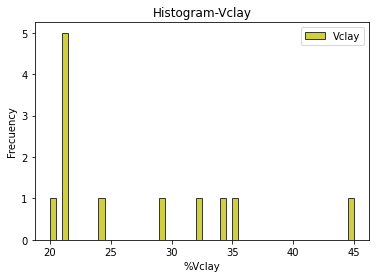

In [7]:
fT2 = './LAS/T2/T2_Information.xls'

xls = pd.read_excel (fT2, sheet_name='Difraction')
prof=xls['Depth (ft)']
clays=xls['Clays']

xls1 = pd.read_excel (fT2, sheet_name='Routine Core')
long=xls1['depth']
poro=xls1['Porosity']
grain=xls1['Grain Density']
sw_core=xls1['tracer adjust water (sw)']

minimo=grain.min()
maximo=grain.max()
c=2.65
d=2.75
norm=(((grain-minimo)*(d-c)/(maximo-minimo))+c)

xls2 = pd.read_excel (fT2, sheet_name='Core Gamma')
h=xls2['DEPTH']
cg=xls2['Core Gamma']
cg1=xls2['core']

xls3 = pd.read_excel (fT2, sheet_name='XRD_%Vol')
cl=xls3['Clays']
dp=xls3['Depth (ft)']
plt.hist(cl,bins=50,facecolor='y',alpha=0.75,ec='black', label="Vclay")
plt.title('Histogram-Vclay')
plt.xlabel('%Vclay')
plt.ylabel('Frecuency')
plt.legend()


In [8]:
## SW_Archie
## SW=((a*Rw)/(Rt*(Por)^m))^(1/n)
## Rt= df_1.AT90
## Rw= df_1.RW2
a=1
m=2
n=2
Rw=df_1.RW2
Rt=df_1.AT90
Phi=df_1.porosity
F = (a / (Phi**m))
df_1['Sw_a']  = (F *Rw/Rt)**(1/n)
df_1['Sw_a1']= df_1['Sw_a'].apply(lambda x: 1 if x>1 else x)
df_1['Sw_a1'] = df_1['Sw_a1'].replace(np.nan, 1)

In [9]:
dfSh = df_1[df_1['Vsh']>0.5]
Rsh = np.percentile(dfSh['AT90'],20)
print(Rsh)

5.36954


In [60]:
## TERM1= 1/RT - VSH/RSH
df_1['term1']=(1/df_1.AT90)-(df_1.Vsh/Rsh)
## TERM2 = F*RW
term2=(F*df_1.RW2)
## TERM3 = (1-vsh)
term3=(1-df_1.Vsh)
## SW_POUPON = ((TERM1*TERM2)/TERM3))^(1/N)
df_1['Sw_p']=((df_1.term1*term2)/term3)**(1/n)

df_1['Sw_p1']= df_1['Sw_p'].apply(lambda x: 1 if x >1 else x)
df_1['Sw_p1'] = df_1['Sw_p1'].replace(np.nan, 1)


In [66]:
  ## Waxman-Smits CEC method (does not require VCL) but requires core measurements of CEC (Eq solved for n=2)
        #Input parameters:
         #phiT - total porosity = Phi
         #aa - WS tortuosity saturation= a
         #mm - WS cementation exponent = m
         #Rw - formation water resistivity ohm.m = Rw
         #B - cation mobility (mho cm2 / meq)
         #Qv cc- concentration of exchange cations per volume unit (meq/ml pore space)
         #CEC - cation exchange capacity of shale(meq/100 gm of sample)
         #DENSMA= grain density - mineral graind density (g/cc)   
CEC= 10**(1.9832*df_1.Vsh-2.4473)
B= 4.6 * (1 - 0.6 * (math.e**(-0.77/Rw)))
Qv = CEC * (1 - Phi) * df_1.grain_density / (100*Phi)  
## df_1['Swc']=0.5*((-B*Qv*RW2)+((B*Qv*RW2)**2+4*F*RW@FT/RESD)**0.5)**(2/N)
df_1['Swc']=0.5*((-B*Qv*Rw)+((B*Qv*Rw)**2+4*F*RWs/Rt)**0.5)**(2/n)
df_1['Swc1'] = df_1['Swc'].replace(np.nan, 1)
print(df_1['Swc'].max())


9.64720411629188


In [61]:
# Simandoux (1963) for shaly-sandy formations, used with saline fm waters Equation solved for n=2
## Input parameters:
    #Rw - water resistivity
    #Rt - true resistivity
    #Phi - porosity
    #Rsh - shale resistivity
    # a - tortuosity factor
    # m - cementation exponent
    # n - saturation exponent
    # Vsh - Volume of shale
## CRAIN'S EQUATION 
#c=(1-df_1.Vsh)*a*(RWs)/(Phi**m)
#d=c*df_1.Vsh/(2*Rsh)
#e=c/Rt
#SWS=((c**2+d)**0.5-d)**(2/n)
df_1['Swsim']=((a*Rw)/(2*(Phi**m)))*(((df_1.Vsh/Rsh)**2+((4*Phi**m)/(a*Rw*Rt)))**(1/2)-(df_1.Vsh/Rsh))
df_1['Swsim1'] = df_1['Swsim'].replace(np.nan, 1)
df_1.head(100)

,GR_EDTC,RHOZ,DEPTH,AT90,NPHI,Vsh,Vclay,grain_density,porosity,RW2,...,Sw_a1,term1,Sw_p,Sw_p1,Swc,Swc1,Sw,Sw1,Swsim,Swsim1
DEPT,,,,,,,,,,,,,,,,,,,,,
3972.0,108.2302,NaN,3971.3870,6.7563,0.4073,0.620275,0.434192,2.712027,NaN,0.254993,...,1.0,0.032493,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000
3971.5,108.2302,NaN,3971.3870,6.7563,0.4073,0.620275,0.434192,2.712027,NaN,0.254993,...,1.0,0.032493,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000
3971.0,108.2302,NaN,3970.9993,6.7563,0.4073,0.620275,0.434192,2.712027,NaN,0.255011,...,1.0,0.032493,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000
3970.5,108.2302,NaN,3970.4998,6.7563,0.4073,0.620275,0.434192,2.712027,NaN,0.255033,...,1.0,0.032493,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000
3970.0,108.2302,NaN,3970.0007,6.7563,0.4073,0.620275,0.434192,2.712027,NaN,0.255056,...,1.0,0.032493,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924.5,108.2302,2.5094,3924.5022,6.3456,0.4073,0.620275,0.434192,2.712027,0.128760,0.257118,...,1.0,0.042072,1.310832,1.000000,2.357744,2.357744,6.403036,6.403036,0.906011,0.906011
3924.0,108.2302,2.5035,3924.0039,6.2522,0.3896,0.620275,0.434192,2.712027,0.132510,0.257141,...,1.0,0.044426,1.308953,1.000000,2.313787,2.313787,6.272823,6.272823,0.902797,0.902797
3923.5,108.2302,2.5036,3923.5000,6.6411,0.3767,0.620275,0.434192,2.712027,0.132446,0.257164,...,1.0,0.035060,1.163425,1.000000,2.231579,2.231579,6.070482,6.070482,0.863356,0.863356


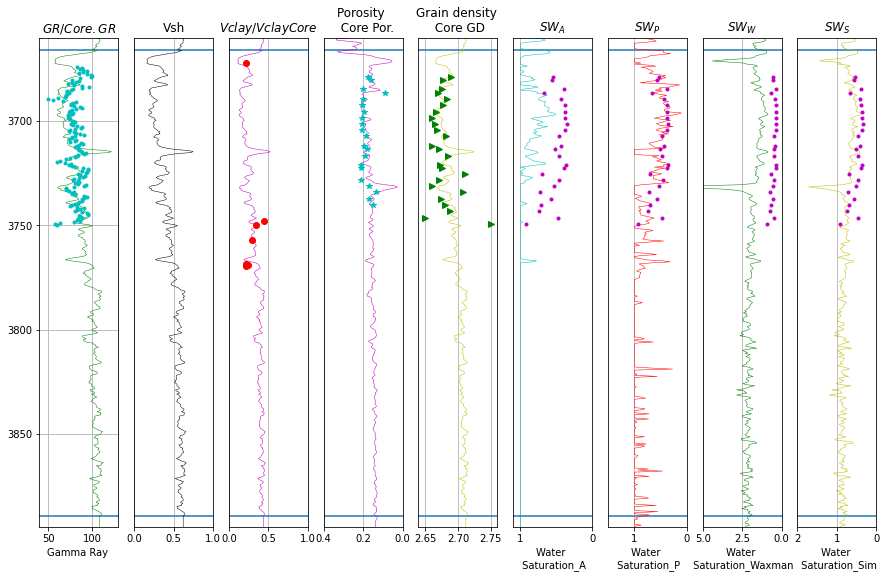

In [62]:
plt.figure(figsize=(15,9))
plt.subplot(191)
plt.plot (df_1.GR_EDTC,df_1.DEPTH,'g',cg1,(h+3),'c.',lw=0.5)
plt.title('$GR/ Core.GR $')
plt.axis([40,130,top,bottom])
plt.xlabel('Gamma Ray ')
plt.gca().invert_yaxis()
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)


plt.subplot(192)
plt.title('Vsh')
plt.plot (df_1.Vsh,df_1.DEPTH,'black',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(193)
plt.title('$Vclay/Vclay Core$')
plt.plot (df_1.Vclay,df_1.DEPTH,'m',clays,(prof+3),'ro',lw=0.5)
plt.axis([0,1, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(194)
plt.title('Porosity \n  Core Por.')
plt.plot (df_1.porosity,df_1.DEPTH,'m',poro,(long+3),'c*',lw=0.5)
plt.axis([0, 0.4, top,bottom])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(195)
plt.title('Grain density \n Core GD')
plt.plot (df_1.grain_density,df_1.DEPTH,'y',norm,(long+3),'g>',lw=0.5)
plt.axis([2.64, 2.76, top,bottom])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(196)
plt.plot (df_1.Sw_a1,df_1.DEPTH,'c',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_A$')
plt.axis([0,1.1,top,bottom])
plt.xlabel('Water \n Saturation_A')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(197)
plt.plot (df_1.Sw_p1,df_1.DEPTH,'r',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_P$')
plt.axis([0,1.5,top,bottom])
plt.xlabel('Water \n Saturation_P')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(198)
plt.plot (df_1.Swc1,df_1.DEPTH,'g',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_W$')
plt.axis([0,5,top,bottom])
plt.xlabel('Water \n Saturation_Waxman')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)

plt.subplot(199)
plt.plot (df_1.Swsim1,df_1.DEPTH,'y',sw_core,(long+3),'m.',lw=0.5)
plt.title('$SW_S$')
plt.axis([0,2,top,bottom])
plt.xlabel('Water \n Saturation_Sim')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().yaxis.set_visible(False)
plt.grid(True)
plt.hlines(y=3665.65, xmin=0, xmax=130)
plt.hlines(y=3889.5, xmin=0, xmax=130)